In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import choice

In [13]:
def compute_saturation(nb_points):
    rand_sets= {}
    steps = 30
    for i in range(nb_points):
        moving = choice(list(range(2,50,2)))
        n_entry_nodes = choice(list(range(2,10)))
        n_exit_nodes = choice(list(range(2,10)))
        n_core_nodes = choice(list(range(10,50,5)))
        n_paths = choice(list(range(5,50,5)))

        # cross validation
        cv = np.zeros((steps+1,5))
        for j in range(5):
            g = RandGraph(actors=10000, 
                              moving = moving, 
                              n_entry_nodes = n_entry_nodes,
                             n_exit_nodes = n_exit_nodes,
                             n_core_nodes = n_core_nodes,
                             n_paths = n_paths)
            data, nodes = g.step(n=steps)
            cv[:,j] = data.mean(axis=1)

        rand_sets[i] = {'moving':moving,
                       'n_entry_nodes':n_entry_nodes,
                       'n_exit_nodes':n_exit_nodes,
                       'n_core_nodes':n_core_nodes,
                       'n_paths':n_paths,
                       'congestion':np.mean(cv.mean(axis=1))}
    return pd.DataFrame.from_dict(rand_sets, orient='index')

In [7]:
data = pd.DataFrame.from_dict(rand_sets, orient='index')

In [14]:
data = compute_saturation(500)

% 97 ||||||||||

In [15]:
data.head()

,moving,n_entry_nodes,n_exit_nodes,n_core_nodes,n_paths,congestion
0,44,4,8,25,35,0.264534
1,4,8,4,15,35,0.088263
2,14,6,7,35,30,0.141675
3,30,5,9,40,5,0.215143
4,44,3,5,10,30,0.464522


In [16]:
data.to_csv('../data/graph_saturation.csv', index=False)

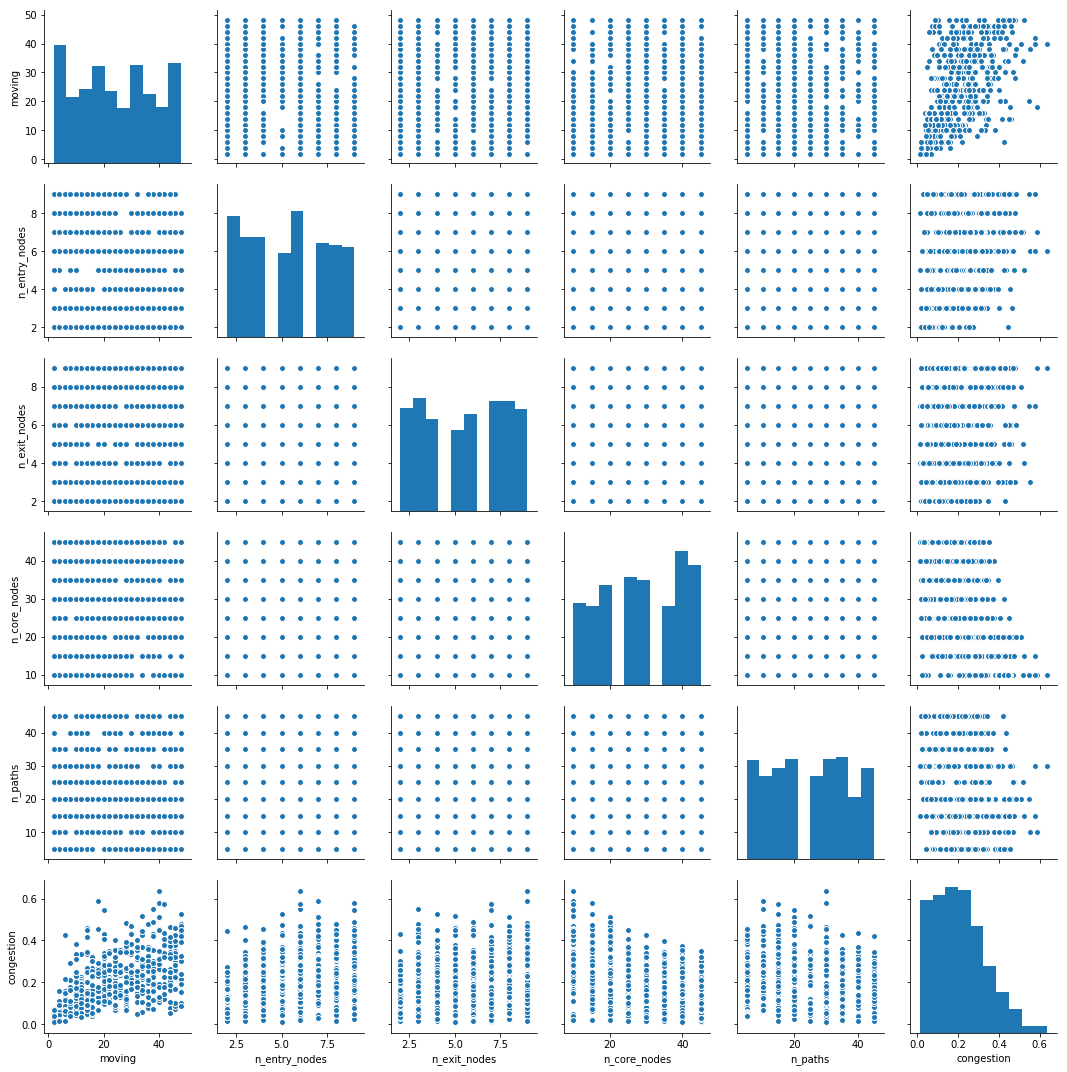

In [17]:
sns.pairplot(data)
plt.show()

## Observation
* the congestion level seems mostly correlated to the number of moving actors